In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load the preprocessed data
df = pd.read_csv('ett.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

In [3]:
# Assuming 'OT' is the target variable
target = df['OT']

In [4]:
# Split the data into train and test sets
train_size = int(len(target) * 0.8)
train, test = target[:train_size], target[train_size:]

In [5]:
# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # You may need to adjust the order
results = model.fit()

c:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [6]:
# Make predictions
predictions = results.forecast(steps=len(test))

In [7]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 25.918467141506124
Mean Absolute Error: 4.2253833156953835
Root Mean Squared Error: 5.0910182813957885


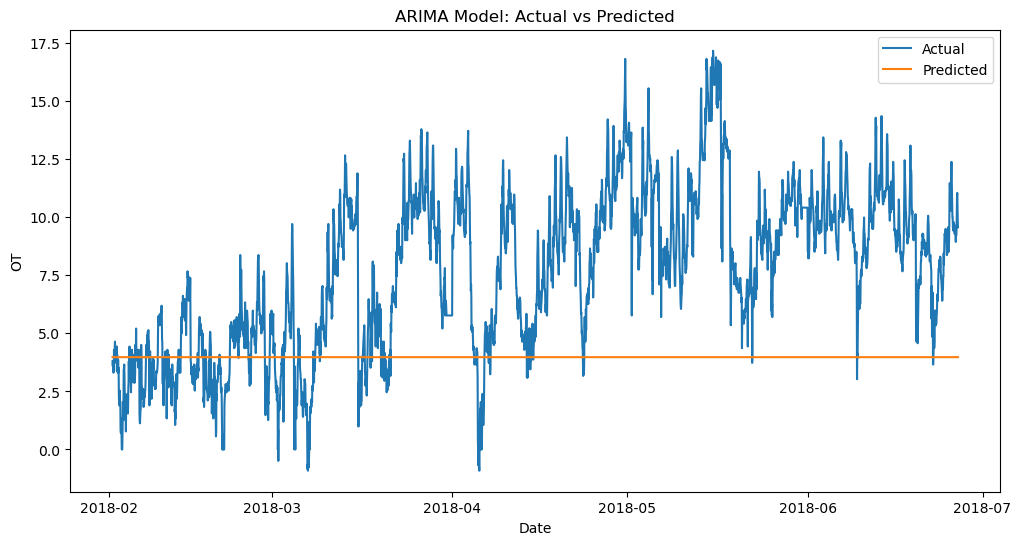

In [8]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.title('ARIMA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()
plt.show()